In [165]:
import numpy as np
import matplotlib.pyplot as plt

In [166]:
def CheckBase(points):
    dists = [np.linalg.norm(points[0]-points[1]),np.linalg.norm(points[0]-points[2]),np.linalg.norm(points[2]-points[1])]
    dists.sort()
    return (dists[0] + dists[1] > dists[2])

In [167]:
def CheckIntersectionTwosegment(s1,s2):
    k1 = (s1[0][1] - s1[1][1])/(s1[0][0] - s1[1][0])
    b1 = s1[0][1] - k1 * s1[0][0]
    k2 = (s2[0][1] - s2[1][1])/(s2[0][0] - s2[1][0])
    b2 = s2[0][1] - k2 * s2[0][0]
    if (s2[0][1] - s2[0][0] * k1 - b1)*(s2[1][1] - s2[1][0] * k1 - b1) <= 0 and (s1[0][1] - s1[0][0] * k2 - b2)*(s1[1][1] - s1[1][0] * k2 - b2) <= 0:
        return True
    return False

In [168]:
def CheckIntersection(s1,s2):
    a1 = s1[0][1] - s1[1][1]
    b1 = s1[1][0] - s1[0][0]
    c1 = -b1*s1[0][1] - a1*s1[0][0]
    a2 = s2[0][1] - s2[1][1]
    b2 = s2[1][0] - s2[0][0]
    c2 = -b2*s2[0][1] - a2*s2[0][0]
    if (s2[0][1]*b1 + s2[0][0] * a1 + c1)*(s2[1][1]*b1 + s2[1][0] * a1 + c1) <= 0 and (s1[0][1]*b2 + s1[0][0] * a2 + c2)*(s1[1][1]*b2 + s1[1][0] * a2 + c2) <= 0:
        return True
    return False

In [169]:
def CheckIfExist(point,figure):
    for p in figure:
        if p[0] == point[0] and p[1] == point[1]:
            return True
    return False

In [170]:
def GetBase(points):
    i1,i2,i3 = np.random.randint(points.shape[0],size = 3)
    while not CheckBase([points[i1],points[i2],points[i3]]):
        i1,i2,i3 = np.random.randint(points.shape[0],size = 3)
    res = np.array([points[i2],points[i3],points[i1]])
    return res

In [171]:
def UpdateFigure(point,figure):
    size = figure.shape[0]
    edgeind = np.random.randint(0,size)
    newedge1 = [figure[edgeind],point]
    newedge2 = [figure[(edgeind+1)%size],point]
    for i in range(0,size):
        if i == edgeind:
            continue
        currEdge = [figure[i],figure[(i+1)%size]]
        currAndFirst = CheckIntersection(currEdge,newedge1) 
        currAndSecond = CheckIntersection(currEdge,newedge2)
        if currAndFirst or currAndSecond:
            if i == (size + edgeind - 1)%size and not currAndSecond:
                continue
            elif i == (edgeind + 1)%size and not currAndFirst:
                continue
            return figure
    figure = np.insert(figure,(edgeind+1)%size,point,axis=0)
    return figure

In [172]:
def UpdateAnyway(point,figure):
    if CheckIfExist(point,figure):
        return figure
    while True:
        newFigure = UpdateFigure(point,figure)
        if newFigure.shape[0]!= figure.shape[0]:
            return newFigure

In [173]:
def CreateRandomPoints(count):
    return np.random.randint(100,size = (count,2))

In [174]:
def ShowPoints(points):
    for p in points:
        plt.plot(p[0],p[1],'bo')
    plt.plot(points[0][0],points[0][1],'r.')
    plt.show()

In [175]:
def DrawRandomSimpleFigure(points):
    return

In [176]:
def FindPolygonArea(points):
    area = 0
    for i in range(1,points.shape[0]):
        area += np.cross(points[i],points[i-1])/2
    return abs(area)

In [177]:
def FindPolygonAreaTrapezia(points):
    area = 0
    for i in range(1,points.shape[0]):
        area += (points[i][0] - points[i-1][0])*(points[i][1]+points[i-1][1])/2
    return abs(area)

In [183]:
points = CreateRandomPoints(50)
triangleBase = GetBase(points)
minarea = 100*100
minpolygon = []

2825.5
2825.5


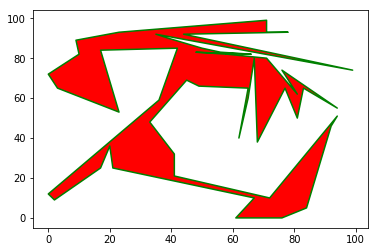

In [244]:
%matplotlib inline
import mpld3
mpld3.enable_notebook()
for i in range(0,10):
    triangleBase = GetBase(points)
    figure = triangleBase
    for p in points:
        figure = UpdateAnyway(p,figure)
    figure = np.append(figure,[figure[0]],axis = 0)
    area = FindPolygonArea(figure)
    if area<minarea:
        minarea = area
        minpolygon = figure
figure = minpolygon
print(FindPolygonArea(figure))
print(FindPolygonAreaTrapezia(figure))
plt.plot(figure[:,0],figure[:,1],'g')
plt.fill(figure[:,0],figure[:,1],'r')
#ShowPoints(points)